<a href="https://colab.research.google.com/github/amikovid/Assignment2-amazon-/blob/main/Pet_Breed_Identifier_(from_scratch).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is Kovid, and I am going to try and recreate the dog breed/cat breed identifier model from scratch using Fast AI models, Oxford data, and a whole bunch of help from ChatGPT

#Getting the data



In [ ]:
from fastai.vision.all import *

path = untar_data(URLs.PETS)
path.ls()

(#2) [Path('/root/.fastai/data/oxford-iiit-pet/annotations'),Path('/root/.fastai/data/oxford-iiit-pet/images')]

Do I still have the data set? To confirm:

In [ ]:
from pathlib import Path
path = Path(untar_data(URLs.PETS))/ 'images'
path.exists()


True

The step above imports data of 7000 dogs and cats from Oxford's data set. I am now going to try and create a "datablock" which can be thought of as a set of instructioins that will tell my model what this data is and how to interact with it


In [ ]:
dls = ImageDataLoaders.from_name_re(
    path/"images",
    get_image_files(path),
    pat= r'([a-zA-Z_]+)_\d+\.jpg$',   # this regex extracts the breed from the filename
    valid_pct=0.2, seed=42,
    item_tfms= Resize(300),
    bs=16,
    batch_tfms=aug_transforms(mult=1.0),
)

Need to confirm:


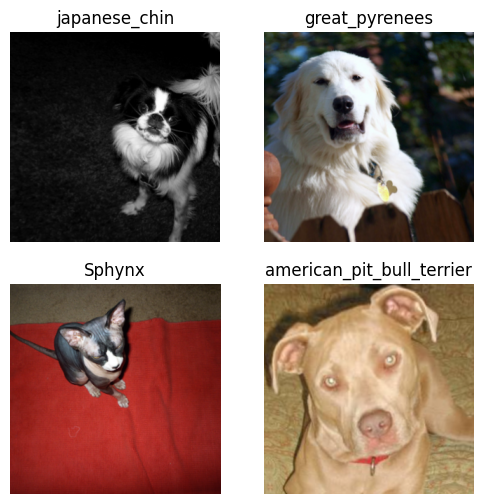

In [ ]:
dls.show_batch(max_n=4)

# Now to train the model


I think I'm going to try and train on the efficient net model instead of the resnet model. It should give better results. Let's install efficient net:

In [ ]:
!pip install timm


In [ ]:
learn = vision_learner(dls, 'efficientnet_b3a', metrics=error_rate)
learn.fine_tune(5)

/usr/local/lib/python3.11/dist-packages/timm/models/_factory.py:126: UserWarning: Mapping deprecated model name efficientnet_b3a to current efficientnet_b3.
  model = create_fn(
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


epoch,train_loss,valid_loss,error_rate,time
0,1.015653,3.547405,0.172530,01:47


epoch,train_loss,valid_loss,error_rate,time
0,0.596597,10.161407,0.150880,02:19
1,0.526737,14.547412,0.122463,02:19
2,0.431151,6.181822,0.106225,02:19
3,0.316043,6.045515,0.092016,02:20
4,0.299431,9.724839,0.092693,02:18



Now for the real test


In [ ]:
from fastai.vision.all import *

img = PILImage.create('/content/98548098.webp')
pred_class, pred_idx, outputs = learn.predict(img)
print(f'Predicted breed: {pred_class}')


Predicted breed: leonberger
